[link to svm tutorial with example](https://www.youtube.com/watch?v=KTeVOb8gaD4)

In [1]:
### Import Packages

In [2]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import datasets
from sklearn import svm
from sklearn.metrics import accuracy_score

[A built in digits Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)
- Matrices representing a low resultion, noisy digits images.

In [3]:
digits = datasets.load_digits()
print("There are",len(digits.data),"examples")

There are 1797 examples


### Create an SVC (Support Vector Classifier) model
- C is Regularization parameter, dermining the ovefitting penalty [image taken from LaptrinhX](https://laptrinhx.com/8-simple-techniques-to-prevent-overfitting-3288224346/) 
![UnderOverfitting.JPG](UnderOverfitting.JPG)
- gamma is the step size in the navigation \ search process (gamma too small - too slow, to big - not accurate
- links to python SVC tutorials:
[1](https://www.youtube.com/watch?v=KHGXpnueZlc) , [2](https://pythonprogramming.net/linear-svc-example-scikit-learn-svm-python/)

In [4]:
clf = svm.SVC(gamma=0.0001 , C=100)


### split the data

In [5]:
X,y = digits.data, digits.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42) 

### fit

In [6]:
clf.fit(X_train,y_train)

SVC(C=100, gamma=0.0001)

Prediction: [7] . True result is:   7


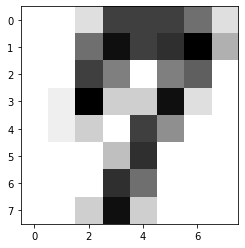

In [7]:
numSample = 3
result_pred = clf.predict( X_test[[numSample]])
print('Prediction:',result_pred, '. True result is:  ',y_test[numSample])
plt.imshow(X_test[numSample].reshape(8,8) , cmap=plt.cm.gray_r , interpolation="nearest")
plt.show()

In [8]:
results = clf.predict( X_test)
accuracy_score(y_test, results)

0.9833333333333333

In [9]:
print(results-y_test)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0 -6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0 -2  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -3
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [18]:
count_notEqual = sum(results-y_test !=0)
print("The are",count_notEqual , "different results between prediction and true data")

The are 6 different results between prediction and true data


In [10]:
#Apply SVC with customized parameters
def RunSvc(step_size,reg, tol = 0.001):
    clf = svm.SVC(gamma=step_size, C=reg, tol=tol)
    clf.fit(X_train,y_train)

    res = clf.predict(X_test)
    return accuracy_score(res,y_test)


- Change regularization

In [11]:
acc = RunSvc(step_size=0.0001 , reg=1)
print("Acc = ",acc)

Acc =  0.9722222222222222


- Change step_size, for better reults

In [12]:
acc = RunSvc(step_size=0.002 , reg=100)
print("Acc = ",acc)

Acc =  0.9888888888888889


- Change step_size, too large

In [13]:
acc = RunSvc(step_size=0.1 , reg=100)
print("Acc = ",acc)

Acc =  0.07777777777777778


- Set tolerance - stop condition (on score improvement is less then)

In [14]:
acc = RunSvc(step_size=0.0001 , reg=100 , tol = 0.1)
print("Acc = ",acc)

Acc =  0.9805555555555555
